In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
iris=sns.load_dataset('iris')
iris=iris.drop('species',axis='columns')

In [13]:
iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width
5.8           2.7          5.1           1.9            2
6.2           2.2          4.5           1.5            1
              2.9          4.3           1.3            1
              3.4          5.4           2.3            1
6.3           2.3          4.4           1.3            1
                                                       ..
5.4           3.9          1.3           0.4            1
                           1.7           0.4            1
5.5           2.3          4.0           1.3            1
              2.4          3.7           1.0            1
7.9           3.8          6.4           2.0            1
Length: 149, dtype: int64

In [14]:
x=iris.drop('petal_width', axis='columns')
feature_names= ['sepal_length', 'sepal_width', 'petal_length']
df=pd.DataFrame(x, columns=feature_names)



In [15]:
y=iris[['petal_width']]

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [19]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [33]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [21]:
model=LinearRegression()

In [22]:
model.fit(xtrain,ytrain)

LinearRegression()

In [23]:
pred=model.predict(xtest)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(ytest,pred)

0.9407619505985546

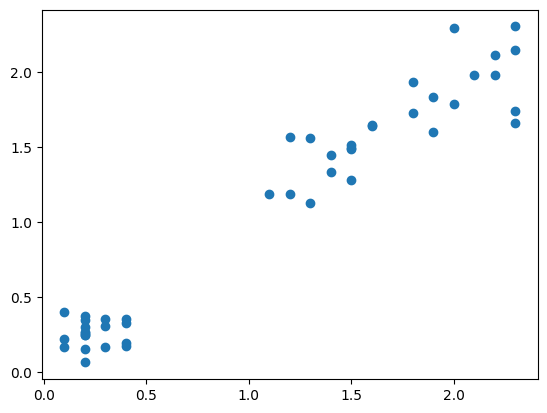

In [26]:
plt.scatter(ytest,pred)

# Pickling the model file for deployment

In [27]:
import pickle

In [28]:
#the 
pickle.dump(model,open('regmodel.pkl','wb'))

In [29]:
#loading the pickle file
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [30]:
ppred=pickled_model.predict(xtest)

In [31]:
r2_score(ytest,ppred)

0.9407619505985546

In [32]:
import sklearn